In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("emails.csv")
labels = dataset.columns.values
labels = np.delete(labels, len(labels) - 1)#why are we deleting the last column?We are deleting the last column because it is the target column

# Split the dataset into training and testing sets with an 80%-20% split
train_index = np.random.rand(len(dataset))<=0.8
train_set = dataset[train_index]
test_set = dataset[~train_index]

train_target = train_set["target"]
train_features = train_set[labels]

test_target = test_set["target"]
test_features = test_set[labels]


In [2]:
# # Load the dataset
# dataset = pd.read_csv("data.csv")
# labels = dataset.columns.values
# labels = np.delete(labels, len(labels) - 1)

# # Split the dataset into training and testing sets with an 70%-30% split
# train_index = np.random.rand(len(dataset)) < 0.7
# train_set = dataset[train_index]
# test_set = dataset[~train_index]

# train_target = train_set["target"]
# train_features = train_set[labels]

# test_target = test_set["target"]
# test_features = test_set[labels]


Text(0.5, 1.0, 'Gender v/s target\n')

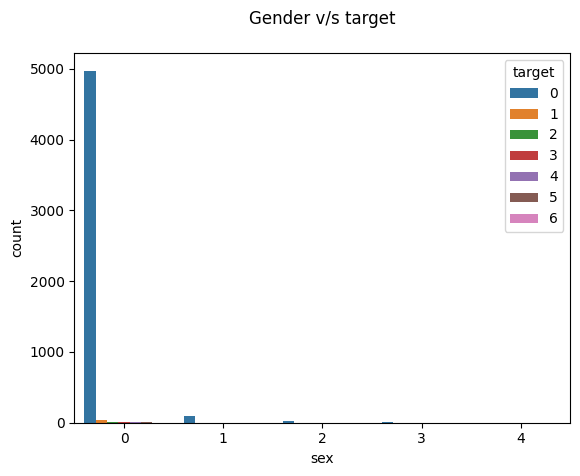

In [3]:
sns.countplot(data= dataset, x='sex',hue='target')
plt.title('Gender v/s target\n')

In [4]:
dataset.head(100)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Email 96,17,15,29,5,8,2,128,3,14,...,0,0,0,0,0,0,0,0,0,0
96,Email 97,8,6,8,0,2,0,48,1,2,...,0,0,0,0,0,0,0,1,0,0
97,Email 98,3,1,1,0,2,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Email 99,2,1,1,0,1,2,20,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
num_samples = len(dataset)
print("Number of samples in the dataset:", num_samples)


Number of samples in the dataset: 5172


In [6]:


# Function to calculate accuracy
def accuracy(true_labels, predicted_labels):
    true_labels_list = list(true_labels)
    predicted_labels_list = list(predicted_labels)
    num_of_correct = 0
    for i in range(len(true_labels_list)):
        if true_labels_list[i] == predicted_labels_list[i]:
            num_of_correct += 1
    return num_of_correct / len(true_labels_list)


# Function to calculate F1 score
def calculate_f1_score(true_labels, predicted_labels):
    true_labels_list = list(true_labels)
    predicted_labels_list = list(predicted_labels)
    
    tp, fp, tn, fn = 0, 0, 0, 0
    
    for i in range(len(true_labels_list)):
        if true_labels_list[i] == 1 and predicted_labels_list[i] == 1:
            tp += 1
        elif true_labels_list[i] == 0 and predicted_labels_list[i] == 1:
            fp += 1
        elif true_labels_list[i] == 1 and predicted_labels_list[i] == 0:
            fn += 1
        else:
            tn += 1
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

# Function to calculate precision
def calculate_precision(true_labels, predicted_labels):
    true_labels_list = list(true_labels)
    predicted_labels_list = list(predicted_labels)
    
    tp, fp = 0, 0
    
    for i in range(len(true_labels_list)):
        if true_labels_list[i] == 1 and predicted_labels_list[i] == 1:
            tp += 1
        elif true_labels_list[i] == 0 and predicted_labels_list[i] == 1:
            fp += 1
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    return precision

# Function to calculate recall
def calculate_recall(true_labels, predicted_labels):
    true_labels_list = list(true_labels)
    predicted_labels_list = list(predicted_labels)
    
    tp, fn = 0, 0
    
    for i in range(len(true_labels_list)):
        if true_labels_list[i] == 1 and predicted_labels_list[i] == 1:
            tp += 1
        elif true_labels_list[i] == 1 and predicted_labels_list[i] == 0:
            fn += 1
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return recall

# Function to perform bagging
def bagging(sample,num):
    global labels, decision_tree_classifier
    target_list = sample["target"]
    features_list = sample[labels]

    decision_tree_classifier = tree.DecisionTreeClassifier()
    decision_tree_classifier.fit(features_list, target_list)
    return decision_tree_classifier.predict(test_features)

# Function to create a tree for a random forest
def make_tree_for_forest(sample):
    random_features_indexes = np.random.choice(range(len(labels)), 5, replace=False)
    randomly_chosen_labels = labels[random_features_indexes]
    train_set_forest = sample[randomly_chosen_labels]
    test_features_forest = test_features[randomly_chosen_labels]

    decision_tree_classifier = tree.DecisionTreeClassifier()
    decision_tree_classifier.fit(train_set_forest, sample["target"])
    return decision_tree_classifier.predict(test_features_forest)

def vote(predictions_list):#where class refers to the possible categories(0 or 1 ) that the model is predicting
    voter = {0:0, 1:0}      #Labels" refer to the predicted values for each instance in the predictions_list.
    total_predictions = []
    for i in range(len(predictions_list[0])):
        for j in range(len(predictions_list)):
            voter[predictions_list[j][i]] += 1
        total_predictions.append(max(voter, key=voter.get))
        voter = {0:0, 1:0}
    return total_predictions



In [7]:
print(len(train_set))

4166


In [8]:
print(len(test_set))

1006


In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Create an ExtraTreesClassifier model
model = ExtraTreesClassifier()

# Fit the model on the training features and target
model.fit(train_features, train_target)

# Print feature importances
print(model.feature_importances_)

# Plot a graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_features.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()


ValueError: could not convert string to float: 'Email 1'

In [10]:
dataset.shape

(5172, 3002)

In [11]:


unique_labels = dataset['target'].unique()

print("Unique class labels:", unique_labels)


Unique class labels: [0 1 3 2 6 4 5]


In [12]:
import pandas as pd

# Assuming 'df' is your Pandas DataFrame
value_counts = dataset['target'].value_counts()

# Access the counts for 0 and 1
count_of_0s = value_counts[0]
count_of_1s = value_counts[1]

print("Count of 0s:", count_of_0s)
print("Count of 1s:", count_of_1s)


Count of 0s: 5105
Count of 1s: 45


In [13]:
decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier.fit(train_features, train_target)

predictions = decision_tree_classifier.predict(test_features)

print("Decision Tree Accuracy:", accuracy(predictions, test_target))

print("-----------------------------")

# bagging
sample_1 = train_set.sample(n=150, replace=True)
sample_2 = train_set.sample(n=150, replace=True)
sample_3 = train_set.sample(n=150, replace=True)
sample_4 = train_set.sample(n=150, replace=True)
sample_5 = train_set.sample(n=150, replace=True)

predictions_1 = bagging(sample_1, 1)
predictions_2 = bagging(sample_2, 2)
predictions_3 = bagging(sample_3, 3)
predictions_4 = bagging(sample_4, 4)
predictions_5 = bagging(sample_5, 5)
predictions = vote([predictions_1, predictions_2, predictions_3, predictions_4, predictions_5])

print("Bagging Accuracy:", accuracy(predictions, test_target))

print("-----------------------------")

# removing features one by one
labels_list = list(labels)
for label in labels_list:
    new_train_features = train_features.drop(columns=[label])
    new_test_features = test_features.drop(columns=[label])

    decision_tree_classifier = tree.DecisionTreeClassifier()
    decision_tree_classifier.fit(new_train_features, train_target)

    predictions = decision_tree_classifier.predict(new_test_features)

    print("Accuracy after removing ", label, ":", accuracy(predictions, test_target))

print("-----------------------------")

ValueError: could not convert string to float: 'Email 1'

In [15]:
# randomly choosing 5 features
random_features_indexes = np.random.choice(range(len(labels)), 5, replace=False)
randomly_chosen_labels = labels[random_features_indexes]

train_features_random = train_features[randomly_chosen_labels]
test_features_random = test_features[randomly_chosen_labels]

decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier.fit(train_features_random, train_target)

predictions = decision_tree_classifier.predict(test_features_random)

print("Randomly Chosen Features:", randomly_chosen_labels)
print("Accuracy of Randomly Chosen Features:", accuracy(predictions, test_target))

print("-----------------------------")

# building random forest

# tree 1
predictions_1 = list(make_tree_for_forest(sample_1)) 

# tree 2
predictions_2 = list(make_tree_for_forest(sample_2)) 

# tree 3
predictions_3 = list(make_tree_for_forest(sample_3)) 

# tree 4
predictions_4 = list(make_tree_for_forest(sample_4)) 

# tree 5
predictions_5 = list(make_tree_for_forest(sample_5)) 

predictions = vote([predictions_1, predictions_2, predictions_3, predictions_4, predictions_5])

print("Accuracy Of Random Forest:", accuracy(predictions, test_target))

Randomly Chosen Features: ['additionally' 'transition' 'wynne' 'single' 'ffffff']
Accuracy of Randomly Chosen Features: 0.9801192842942346
-----------------------------


NameError: name 'sample_1' is not defined

In [16]:
#to print individual accuracies
print("Accuracy of tree 1:", accuracy(predictions_1, test_target))
print("Accuracy of tree 2:", accuracy(predictions_2, test_target))
print("Accuracy of tree 3:", accuracy(predictions_3, test_target))
print("Accuracy of tree 4:", accuracy(predictions_4, test_target))
print("Accuracy of tree 5:", accuracy(predictions_5, test_target))

NameError: name 'predictions_1' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using your trained random forest classifier
predictions = make_tree_for_forest(sample_1)  
# Create the confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[22  9]
 [10 25]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using your trained random forest classifier
predictions = make_tree_for_forest(sample_2) 

# Create the confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[24  7]
 [ 9 26]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using your trained random forest classifier
predictions = make_tree_for_forest(sample_3)  
# Create the confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[16 15]
 [ 9 26]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using your trained random forest classifier
predictions = make_tree_for_forest(sample_4)  

# Create the confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[21 10]
 [ 8 27]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using your trained random forest classifier
predictions = make_tree_for_forest(sample_5)  # Replace 'sample_1' with the appropriate sample

# Create the confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[20 11]
 [11 24]]


In [ ]:
# Decision Tree
decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier.fit(train_features, train_target)
predictions_tree = decision_tree_classifier.predict(test_features)

# Calculate and print precision, recall, and F1 score for Decision Tree
precision_tree = calculate_precision(test_target, predictions_tree)
recall_tree = calculate_recall(test_target, predictions_tree)
f1_tree = calculate_f1_score(test_target, predictions_tree)

print("Decision Tree Precision:", precision_tree)
print("Decision Tree Recall:", recall_tree)
print("Decision Tree F1 Score:", f1_tree)

# Bagging
num_bagging_models = 5
predictions_list_bagging = []
precision_list_bagging = []  # List to store precision for each Bagging model
recall_list_bagging = []  # List to store recall for each Bagging model
f1_list_bagging = []  # List to store F1 score for each Bagging model

for i in range(num_bagging_models):
    sample = train_set.sample(n=150, replace=True)
    predictions = bagging(sample, i)
    predictions_list_bagging.append(predictions)
    
    # Calculate precision, recall, and F1 for each Bagging model
    precision_bagging = calculate_precision(test_target, predictions)
    recall_bagging = calculate_recall(test_target, predictions)
    f1_bagging = calculate_f1_score(test_target, predictions)
    
    precision_list_bagging.append(precision_bagging)
    recall_list_bagging.append(recall_bagging)
    f1_list_bagging.append(f1_bagging)

# Aggregate predictions through majority voting
aggregated_predictions_bagging = vote(predictions_list_bagging)

# Calculate and print the average precision, recall, and F1 score for Bagging
average_precision_bagging = np.mean(precision_list_bagging)
average_recall_bagging = np.mean(recall_list_bagging)
average_f1_bagging = np.mean(f1_list_bagging)

print("Bagging Average Precision:", average_precision_bagging)
print("Bagging Average Recall:", average_recall_bagging)
print("Bagging Average F1 Score:", average_f1_bagging)


Decision Tree Precision: 0.7647058823529411
Decision Tree Recall: 0.7428571428571429
Decision Tree F1 Score: 0.7536231884057971
Bagging Average Precision: 0.7265417703007373
Bagging Average Recall: 0.8114285714285714
Bagging Average F1 Score: 0.7652860742105594


In [ ]:
#also print the individual precision, recall and f1 scores for each bagging model
print("Precision of bagging model 1:", precision_list_bagging[0])
print("Precision of bagging model 2:", precision_list_bagging[1])
print("Precision of bagging model 3:", precision_list_bagging[2])
print("Precision of bagging model 4:", precision_list_bagging[3])
print("Precision of bagging model 5:", precision_list_bagging[4])


Precision of bagging model 1: 0.7941176470588235
Precision of bagging model 2: 0.7142857142857143
Precision of bagging model 3: 0.7027027027027027
Precision of bagging model 4: 0.7073170731707317
Precision of bagging model 5: 0.7142857142857143


In [ ]:
#similarlywe can foind recall and f1 scores for each bagging model
print("Recall of bagging model 1:", recall_list_bagging[0])
print("Recall of bagging model 2:", recall_list_bagging[1])
print("Recall of bagging model 3:", recall_list_bagging[2])
print("Recall of bagging model 4:", recall_list_bagging[3])
print("Recall of bagging model 5:", recall_list_bagging[4])


Recall of bagging model 1: 0.7714285714285715
Recall of bagging model 2: 0.8571428571428571
Recall of bagging model 3: 0.7428571428571429
Recall of bagging model 4: 0.8285714285714286
Recall of bagging model 5: 0.8571428571428571


In [ ]:
#f1 scores for each bagging model
print("F1 score of bagging model 1:", f1_list_bagging[0])
print("F1 score of bagging model 2:", f1_list_bagging[1])
print("F1 score of bagging model 3:", f1_list_bagging[2])
print("F1 score of bagging model 4:", f1_list_bagging[3])
print("F1 score of bagging model 5:", f1_list_bagging[4])


F1 score of bagging model 1: 0.782608695652174
F1 score of bagging model 2: 0.7792207792207793
F1 score of bagging model 3: 0.7222222222222223
F1 score of bagging model 4: 0.7631578947368421
F1 score of bagging model 5: 0.7792207792207793


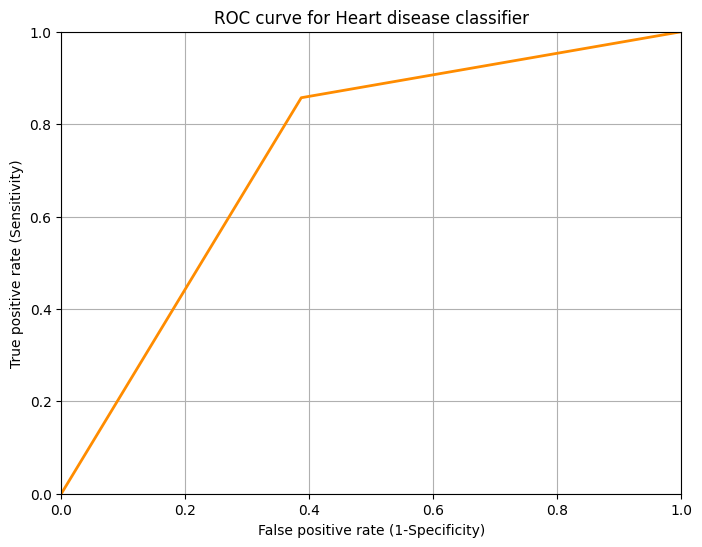

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_target, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()
